**姚泽洲 3220231262**

选取数据集：

YELP: https://www.yelp.com/dataset/download

Microsoft 资讯推荐:  https://learn.microsoft.com/zh-cn/azure/open-datasets/dataset-microsoft-news?tabs=azureml-opendatasets


***YELP数据集***

In [3]:
import csv
import json
import sys
import os
import pandas as pd
import numpy as np

#yelp_academic_dataset_business.json：包含了Yelp商家信息的数据
#每个商家的信息都以JSON格式存储，包括商家的名称、地址、经纬度坐标、类别（如餐厅、咖啡馆等）、营业时间、星级评分以及其他相关信息。这个文件用于描述Yelp平台上注册的商家的基本信息。
#yelp_academic_dataset_checkin.json：包含用户在Yelp平台上进行签到（Check-in）的数据
#签到是指用户在实体店面（如餐厅、商店等）实际到达的时间点记录。这个文件存储了用户签到的时间和商家的信息，可以用于分析用户活动模式和商家受欢迎程度。
#yelp_academic_dataset_review.json：包含了Yelp用户对商家的评论数据
#每条评论都以JSON格式存储，包括用户ID、商家ID、评分、评论文本、评论时间等信息。这个文件是Yelp数据集中最重要的部分，用于进行情感分析、自然语言处理和用户行为分析等任务。
#yelp_academic_dataset_tip.json: 包含用户在Yelp平台上对商家的小费（Tip）数据
#小费是指用户给予商家的建议、提示或推荐，类似于评论但通常更为简短。每条小费数据都包含了用户ID、商家ID、小费文本、小费时间等信息。
#yelp_academic_dataset_user.json: 包含了Yelp平台上用户的基本信息
#每个用户的数据都以JSON格式存储，包括用户ID、姓名、注册时间、好友列表、评分分布、评论数量等信息。这个文件提供了关于Yelp用户的一些统计信息和行为模式。

json_file_path='yelp_academic_dataset_review.json'
csv_file_path='yelp_academic_dataset_review.csv'

#打开json文件,取出第一行列名
with open(json_file_path,'r',encoding='utf-8') as fin:
    for line in fin:
        line_contents = json.loads(line)
        headers=line_contents.keys()
        break
    print(headers)
    
#将json读成字典,其键值写入csv的列名,再将json文件中的values逐行写入csv文件
with open(csv_file_path, 'w', newline='',encoding='utf-8') as fout:
    writer=csv.DictWriter(fout, headers)
    writer.writeheader()
    with open(json_file_path, 'r', encoding='utf-8') as fin:
        for line in fin:
            line_contents = json.loads(line)
            #if 'Phoenix' in line_contents.values():
            writer.writerow(line_contents)

#删除缺失行
df_bus=pd.read_csv(csv_file_path)
df_cleaned=df_bus.dropna()
df_cleaned.to_csv(csv_file_path,index=False)
df_bus=pd.read_csv(csv_file_path)

df_bus.to_csv(csv_file_path,index=False)


dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])


In [4]:
import pandas as pd
review = pd.read_csv('yelp_academic_dataset_review.csv')
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


**yelp的review数据集：**

1. "review_id": "KU_O5udG6zpxOg-VcAEodg"
评论的唯一标识符，用于区分不同的评论记录。

2. "user_id": "mh_-eMZ6K5RLWhZyISBhwA"
用户的唯一标识符，用于区分不同的用户。

3. "business_id": "XQfwVwDr-v0ZS3_CbbE5Xw"
商家的唯一标识符，用于指示该评论所属的商家。

4. "stars": 3.0
用户对商家的星级评分，范围通常是1到5，表示对商家的满意程度。

5. "useful": 0
其他用户对这条评论的评价，表示该评论对其他用户是否有用。

6. "funny": 0
其他用户对这条评论是否觉得有趣或幽默。

7. "cool": 0
其他用户对这条评论是否觉得酷或有品味。

8. "text":
“If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to its other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.”
用户撰写的评论文本，对用户在该商家就餐的体验和观点进行描述。

9. "date": "2018-07-07 22:09:11"
评论发布的日期和时间

In [26]:
review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [6]:
missing_counts0 = pd.DataFrame(review.isnull().sum(), columns=['missing_counts']).T #获取缺失值数量
missing_counts0  #这里由于在json转csv过程中已经删除缺失行，缺失值为零

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
missing_counts,0,0,0,0,0,0,0,0,0


In [14]:
from mlxtend.preprocessing import TransactionEncoder

# 读取数据集
df = review.copy()

# 选择需要的列
data = df[['user_id', 'business_id']]

# 将数据转换为交易列表
transactions = data.groupby('user_id')['business_id'].apply(list).values.tolist()

# 使用 TransactionEncoder 将交易列表转换为适合关联规则挖掘的格式
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
basket_sets = pd.DataFrame(te_ary, columns=te.columns_)

# 应用关联规则挖掘算法
frequent_itemsets = fpgrowth(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# 打印关联规则
print(rules)

#尝试挖掘用户和商家之间的频繁模式和关联规则，但是内存好像不太够（700万行的数据……）

MemoryError: Unable to allocate 278. GiB for an array with shape (1987929, 150346) and data type bool

In [38]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# 加载数据集
data = review.copy()

# 选择感兴趣的列
interest_columns = ['stars', 'useful', 'funny', 'cool']
interesting_data = data[interest_columns]

# 将星级评分分成两个类别，大于等于3为1，小于3为0
interesting_data['stars'] = interesting_data['stars'].apply(lambda x: 1 if x >= 3 else 0)

# 将所有列的值转换为0和1
interesting_data = interesting_data.applymap(lambda x: 1 if x > 0 else 0)
# 使用Apriori算法找出频繁模式
frequent_itemsets = apriori(interesting_data, min_support=0.1, use_colnames=True)

print(frequent_itemsets)

# 使用关联规则找出关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 打印关联规则
print(rules)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8560\2105430211.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesting_data['stars'] = interesting_data['stars'].apply(lambda x: 1 if x >= 3 else 0)
C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support               itemsets
0  0.769136                (stars)
1  0.450595               (useful)
2  0.156812                (funny)
3  0.230651                 (cool)
4  0.328984        (stars, useful)
5  0.106824         (stars, funny)
6  0.203601          (stars, cool)
7  0.130142        (useful, funny)
8  0.196866         (useful, cool)
9  0.172487  (stars, useful, cool)
       antecedents      consequents  antecedent support  consequent support  \
0         (useful)          (stars)            0.450595            0.769136   
1          (funny)          (stars)            0.156812            0.769136   
2           (cool)          (stars)            0.230651            0.769136   
3          (funny)         (useful)            0.156812            0.450595   
4           (cool)         (useful)            0.230651            0.450595   
5  (stars, useful)           (cool)            0.328984            0.230651   
6    (stars, cool)         (useful)            0.203601       

In [27]:
# 按照支持度（support）的大小降序排列频繁项集
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

# 打印输出排序后的频繁项集
print("按照支持度降序排列的频繁项集：")
print(frequent_itemsets_sorted)


按照支持度降序排列的频繁项集：
    support               itemsets
0  0.769136                (stars)
1  0.450595               (useful)
4  0.328984        (stars, useful)
3  0.230651                 (cool)
6  0.203601          (stars, cool)
8  0.196866         (useful, cool)
9  0.172487  (stars, useful, cool)
2  0.156812                (funny)
7  0.130142        (useful, funny)
5  0.106824         (stars, funny)


**频繁项集分析：**

列出了数据中的频繁项集（Itemsets），并给出了它们的支持度（Support）。支持度表示包含该项集的数据记录所占的比例。

例如，(stars) 频繁项集的支持度为 0.769136，表示星级评分大于等于3分（高星级评分）的出现在数据集中的记录所占比例约为 76.91%。

(stars, useful)的支持度为 0.328984，表示高星级评分和有用同时出现的比例达到了32.90%。

In [39]:
# 按照支持度（support）的大小降序排列关联规则
rules_support_sorted = rules.sort_values(by='support', ascending=False)

# 打印输出排序后的关联规则
print("按照支持度降序排列的关联规则：")
print(rules_support_sorted)


按照支持度降序排列的关联规则：
       antecedents      consequents  antecedent support  consequent support  \
0         (useful)          (stars)            0.450595            0.769136   
2           (cool)          (stars)            0.230651            0.769136   
4           (cool)         (useful)            0.230651            0.450595   
5  (stars, useful)           (cool)            0.328984            0.230651   
6    (stars, cool)         (useful)            0.203601            0.450595   
7   (useful, cool)          (stars)            0.196866            0.769136   
8           (cool)  (stars, useful)            0.230651            0.328984   
3          (funny)         (useful)            0.156812            0.450595   
1          (funny)          (stars)            0.156812            0.769136   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.328984    0.730111  0.949260 -0.017585    0.855401      -0.088664  
2  0.203601    0.882725  1.147683  0.026199    

In [40]:
# 按照置信度（confidence）的大小降序排列关联规则
rules_support_sorted = rules.sort_values(by='confidence', ascending=False)

# 打印输出排序后的关联规则
print("按照置信度降序排列的关联规则：")
print(rules_support_sorted)


按照置信度降序排列的关联规则：
       antecedents      consequents  antecedent support  consequent support  \
2           (cool)          (stars)            0.230651            0.769136   
7   (useful, cool)          (stars)            0.196866            0.769136   
4           (cool)         (useful)            0.230651            0.450595   
6    (stars, cool)         (useful)            0.203601            0.450595   
3          (funny)         (useful)            0.156812            0.450595   
8           (cool)  (stars, useful)            0.230651            0.328984   
0         (useful)          (stars)            0.450595            0.769136   
1          (funny)          (stars)            0.156812            0.769136   
5  (stars, useful)           (cool)            0.328984            0.230651   

    support  confidence      lift  leverage  conviction  zhangs_metric  
2  0.203601    0.882725  1.147683  0.026199    1.968558       0.167257  
7  0.172487    0.876165  1.139154  0.021070    

In [41]:
# 按照 Zhang's metric（张氏指标）的大小降序排列关联规则
rules_sorted_zhangs_metric = rules.sort_values(by='zhangs_metric', ascending=False)

# 打印输出排序后的关联规则
print("按照 Zhang's metric（张氏指标）降序排列的关联规则：")
print(rules_sorted_zhangs_metric)


按照 Zhang's metric（张氏指标）降序排列的关联规则：
       antecedents      consequents  antecedent support  consequent support  \
5  (stars, useful)           (cool)            0.328984            0.230651   
8           (cool)  (stars, useful)            0.230651            0.328984   
4           (cool)         (useful)            0.230651            0.450595   
6    (stars, cool)         (useful)            0.203601            0.450595   
3          (funny)         (useful)            0.156812            0.450595   
2           (cool)          (stars)            0.230651            0.769136   
7   (useful, cool)          (stars)            0.196866            0.769136   
0         (useful)          (stars)            0.450595            0.769136   
1          (funny)          (stars)            0.156812            0.769136   

    support  confidence      lift  leverage  conviction  zhangs_metric  
5  0.172487    0.524302  2.273141  0.096607    1.617306       0.834675  
8  0.172487    0.747827  2.27

**关联规则分析**

高星级评分因素模式：

规则 (useful) -> (stars) 显示了评论被标记为有用时，通常会与较高的星级评分同时出现，其置信度为 0.73，表明评论被标记为有用时，高星级评分的概率较高。通过 Leverage 和 Conviction 指标的分析，可以看出这种关联并不是简单的共现关系，而是具有一定的统计意义。Lift 值略低于1，表明有用性与高星级评分之间的关系比较弱，但依然有一定的相关性。

规则 (cool) -> (stars) 表明评论被标记为酷时，它们更可能被赋予高星级评分。置信度为 0.88，说明了这种关联的强度。可能是因为用户更倾向于给觉得酷的评论更高的评分。

规则 (stars, cool) -> (useful) 和 (useful, cool) -> (stars) 表明当评论同时被标记为酷和高星级评分时，它们也很可能被标记为有用。这表明在评价为酷的评论中，通常会包含有用的信息。类似地，规则 (stars, funny) -> (useful) 显示了在标记为有趣的评论中，也很可能包含有用的信息。这可能是因为有趣的评论往往会吸引更多的关注，从而被更多人标记为有用。


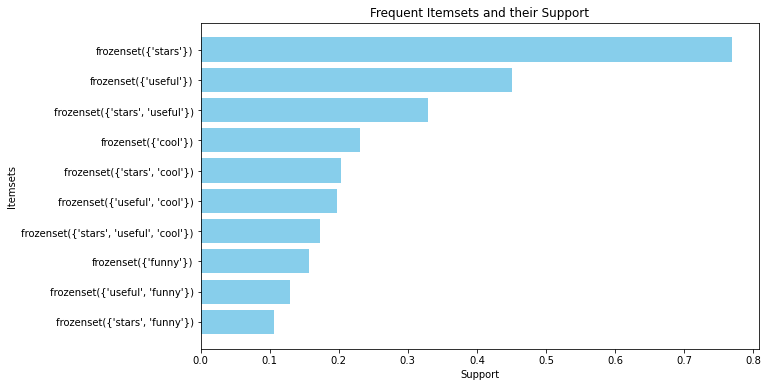

In [42]:
import matplotlib.pyplot as plt

# 绘制频繁项集支持度的条形图
plt.figure(figsize=(10, 6))
plt.barh(frequent_itemsets_sorted['itemsets'].astype(str), frequent_itemsets_sorted['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets and their Support')
plt.gca().invert_yaxis()  # 反转y轴，使支持度高的项集在上方
plt.show()


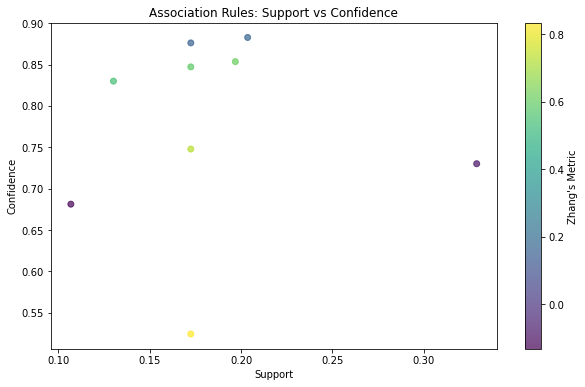

In [43]:
# 绘制关联规则支持度和置信度的散点图
plt.figure(figsize=(10, 6))
plt.scatter(rules_sorted_zhangs_metric['support'], rules_sorted_zhangs_metric['confidence'], c=rules_sorted_zhangs_metric['zhangs_metric'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Zhang's Metric")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()


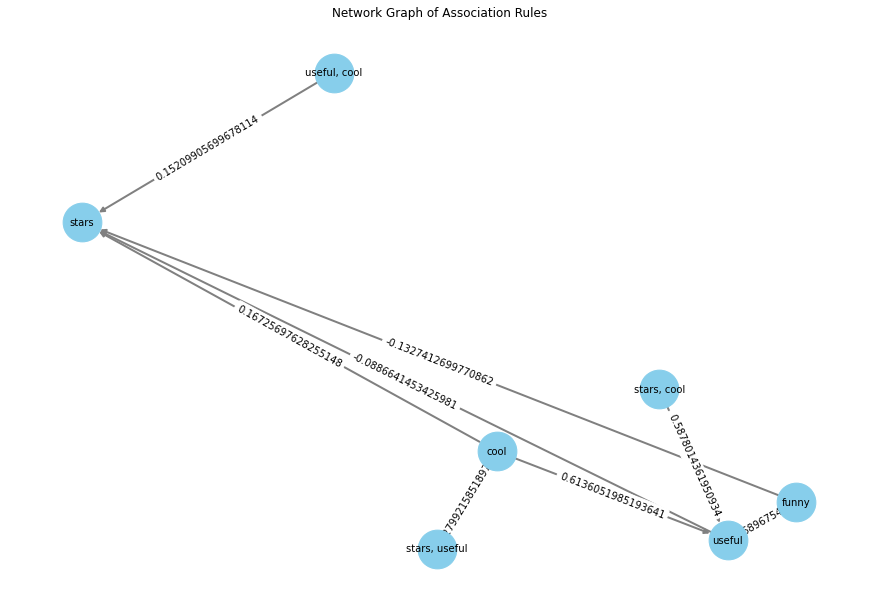

In [44]:
import networkx as nx

# 创建一个空的有向图
G = nx.DiGraph()

# 添加关联规则作为边
for index, row in rules_sorted_zhangs_metric.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['zhangs_metric'])

# 绘制网络图
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, edge_color='gray', width=2, arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Network Graph of Association Rules")
plt.show()


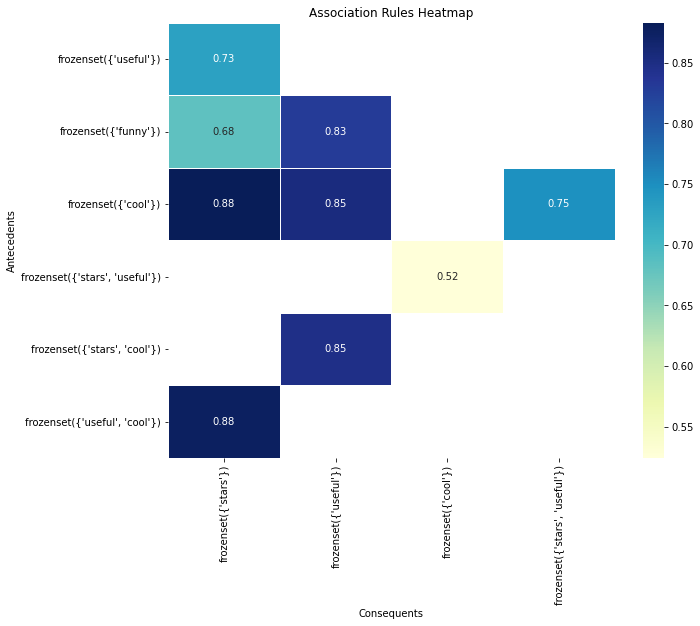

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个包含关联规则的DataFrame
rules_df = pd.DataFrame(rules)

# 构建关联规则矩阵
matrix = rules_df.pivot(index='antecedents', columns='consequents', values='confidence')

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title('Association Rules Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


In [16]:
checkin = pd.read_csv('yelp_academic_dataset_checkin.csv')  #浅浅加载一下yelp数据集中五个数据集的checkin数据集，同样通过json转csv
checkin.head()

,Unnamed: 0,business_id,date
0,0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


***Microsoft 资讯推荐 数据集***

In [47]:
import os
import tempfile
import shutil
import urllib
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
temp_dir = os.path.join(tempfile.gettempdir(), 'mind')
os.makedirs(temp_dir, exist_ok=True)

# The dataset is split into training and validation set, each with a large and small version.
# The format of the four files are the same.
# For demonstration purpose, we will use small version validation set only.
base_url = 'https://mind201910small.blob.core.windows.net/release'
training_small_url = f'{base_url}/MINDsmall_train.zip' 
validation_small_url = f'{base_url}/MINDsmall_dev.zip' 
training_large_url = f'{base_url}/MINDlarge_train.zip'
validation_large_url = f'{base_url}/MINDlarge_dev.zip'

In [48]:
def download_url(url,
                 destination_filename=None,
                 progress_updater=None,
                 force_download=False,
                 verbose=True):
    """
    Download a URL to a temporary file
    """
    if not verbose:
        progress_updater = None
    # This is not intended to guarantee uniqueness, we just know it happens to guarantee
    # uniqueness for this application.
    if destination_filename is None:
        url_as_filename = url.replace('://', '_').replace('/', '_')
        destination_filename = \
            os.path.join(temp_dir,url_as_filename)
    if (not force_download) and (os.path.isfile(destination_filename)):
        if verbose:
            print('Bypassing download of already-downloaded file {}'.format(
                os.path.basename(url)))
        return destination_filename
    if verbose:
        print('Downloading file {} to {}'.format(os.path.basename(url),
                                                 destination_filename),
              end='')
    urllib.request.urlretrieve(url, destination_filename, progress_updater)
    assert (os.path.isfile(destination_filename))
    nBytes = os.path.getsize(destination_filename)
    if verbose:
        print('...done, {} bytes.'.format(nBytes))
    return destination_filename

In [49]:
# For demonstration purpose, we will use small version validation set only.
# This file is about 30MB.
zip_path = download_url(validation_small_url, verbose=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)

os.listdir(temp_dir)

['behaviors.tsv',
 'entity_embedding.vec',
 'https_mind201910small.blob.core.windows.net_release_MINDsmall_dev.zip',
 'news.tsv',
 'relation_embedding.vec']

In [50]:
# The behaviors.tsv file contains the impression logs and users' news click histories. 
# It has 5 columns divided by the tab symbol:
# - Impression ID. The ID of an impression.
# - User ID. The anonymous ID of a user.
# - Time. The impression time with format "MM/DD/YYYY HH:MM:SS AM/PM".
# - History. The news click history (ID list of clicked news) of this user before this impression.
# - Impressions. List of news displayed in this impression and user's click behaviors on them (1 for click and 0 for non-click).
behaviors_path = os.path.join(temp_dir, 'behaviors.tsv')
dataframe_behaviors = pd.read_table(
    behaviors_path,
    header=None,
    names=['impression_id', 'user_id', 'time', 'history', 'impressions'])
dataframe_behaviors

,impression_id,user_id,time,history,impressions
0,1,U80234,11/15/2019 12:37:50 PM,N55189 N46039 N51741 N53234 N11276 N264 N40716...,N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...
1,2,U60458,11/15/2019 7:11:50 AM,N58715 N32109 N51180 N33438 N54827 N28488 N611...,N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...
2,3,U44190,11/15/2019 9:55:12 AM,N56253 N1150 N55189 N16233 N61704 N51706 N5303...,N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...
3,4,U87380,11/15/2019 3:12:46 PM,N63554 N49153 N28678 N23232 N43369 N58518 N444...,N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...
4,5,U9444,11/15/2019 8:25:46 AM,N51692 N18285 N26015 N22679 N55556,N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...
...,...,...,...,...,...
73147,73148,U77536,11/15/2019 8:40:16 PM,N28691 N8845 N58434 N37120 N22185 N60033 N4702...,N496-0 N35159-0 N59856-0 N13270-0 N47213-0 N26...
73148,73149,U56193,11/15/2019 1:11:26 PM,N4705 N58782 N53531 N46492 N26026 N28088 N3109...,N49285-0 N31958-0 N55237-0 N42844-0 N29862-0 N...
73149,73150,U16799,11/15/2019 3:37:06 PM,N40826 N42078 N15670 N15295 N64536 N46845 N52294,N7043-0 N512-0 N60215-1 N45057-0 N496-0 N37055...
73150,73151,U8786,11/15/2019 8:29:26 AM,N3046 N356 N20483 N46107 N44598 N18693 N8254 N...,N23692-0 N19990-0 N20187-0 N5940-0 N13408-0 N3...


In [51]:
# The news.tsv file contains the detailed information of news articles involved in the behaviors.tsv file.
# It has 7 columns, which are divided by the tab symbol:
# - News ID
# - Category
# - Subcategory
# - Title
# - Abstract
# - URL
# - Title Entities (entities contained in the title of this news)
# - Abstract Entities (entities contained in the abstract of this news)
news_path = os.path.join(temp_dir, 'news.tsv')
dataframe_news = pd.read_table(news_path,
              header=None,
              names=[
                  'id', 'category', 'subcategory', 'title', 'abstract', 'url',
                  'title_entities', 'abstract_entities'
              ])
dataframe_news

,id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
42411,N63550,lifestyle,lifestyleroyals,Why Kate & Meghan Were on Different Balconies ...,There's no scandal here. It's all about the or...,https://assets.msn.com/labs/mind/BBWyynu.html,"[{""Label"": ""Meghan, Duchess of Sussex"", ""Type""...",[]
42412,N30345,entertainment,entertainment-celebrity,See the stars at the 2019 Baby2Baby gala,Stars like Chrissy Teigen and Kate Hudson supp...,https://assets.msn.com/labs/mind/BBWyz7N.html,[],"[{""Label"": ""Kate Hudson"", ""Type"": ""P"", ""Wikida..."
42413,N30135,news,newsgoodnews,Tennessee judge holds lawyer's baby as he swea...,Tennessee Court of Appeals Judge Richard Dinki...,https://assets.msn.com/labs/mind/BBWyzI8.html,"[{""Label"": ""Tennessee"", ""Type"": ""G"", ""Wikidata...","[{""Label"": ""Tennessee Court of Appeals"", ""Type..."
42414,N44276,autos,autossports,Best Sports Car Deals for October,NaN,https://assets.msn.com/labs/mind/BBy5rVe.html,"[{""Label"": ""Peugeot RCZ"", ""Type"": ""V"", ""Wikida...",[]


In [52]:
# The entity_embedding.vec file contains the 100-dimensional embeddings
# of the entities learned from the subgraph by TransE method.
# The first column is the ID of entity, and the other columns are the embedding vector values.
entity_embedding_path = os.path.join(temp_dir, 'entity_embedding.vec')
entity_embedding = pd.read_table(entity_embedding_path, header=None)
entity_embedding['vector'] = entity_embedding.iloc[:, 1:101].values.tolist()
entity_embedding = entity_embedding[[0,
                                     'vector']].rename(columns={0: "entity"})
entity_embedding

,entity,vector
0,Q34433,"[0.017808, -0.073256, 0.102521, -0.059926, -0...."
1,Q41,"[-0.063388, -0.181451, 0.057501, -0.091254, -0..."
2,Q56037,"[0.02155, -0.044888, -0.027872, -0.128843, 0.0..."
3,Q1860,"[0.060958, 0.069934, 0.015832, 0.079471, -0.02..."
4,Q39631,"[-0.093106, -0.052002, 0.020556, -0.020801, 0...."
...,...,...
22888,Q278846,"[0.042413, 0.021957, 0.072414, -0.068437, 0.02..."
22889,Q54621949,"[-0.018299, -0.048378, -0.021645, -0.079743, 0..."
22890,Q42225228,"[-0.051346, -0.028947, -0.07587, 0.017512, -0...."
22891,Q54862508,"[-0.052323, -0.078029, -0.060925, -0.052536, 0..."


In [53]:
# The relation_embedding.vec file contains the 100-dimensional embeddings
# of the relations learned from the subgraph by TransE method.
# The first column is the ID of relation, and the other columns are the embedding vector values.
relation_embedding_path = os.path.join(temp_dir, 'relation_embedding.vec')
relation_embedding = pd.read_table(relation_embedding_path, header=None)
relation_embedding['vector'] = relation_embedding.iloc[:,
                                                       1:101].values.tolist()
relation_embedding = relation_embedding[[0, 'vector'
                                         ]].rename(columns={0: "relation"})
relation_embedding

,relation,vector
0,P31,"[-0.073467, -0.132227, 0.034173, -0.032769, 0...."
1,P21,"[-0.078436, 0.108589, -0.049429, -0.131355, 0...."
2,P106,"[-0.052137, 0.052444, -0.019886, -0.152309, 0...."
3,P735,"[-0.051398, 0.056219, 0.068029, -0.137717, -0...."
4,P108,"[0.091231, 0.022526, 0.059349, -0.141853, 0.03..."
...,...,...
1086,P1897,"[-0.019021, 0.001183, -0.009602, -0.040833, -0..."
1087,P3776,"[-0.018365, 0.028526, -0.025934, 0.032296, -0...."
1088,P1194,"[-0.026819, 0.003231, -0.011298, -0.015206, 0...."
1089,P2502,"[0.003554, -0.041121, -0.010559, -0.037862, -0..."


In [54]:
dataframe_behaviors

,impression_id,user_id,time,history,impressions
0,1,U80234,11/15/2019 12:37:50 PM,N55189 N46039 N51741 N53234 N11276 N264 N40716...,N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...
1,2,U60458,11/15/2019 7:11:50 AM,N58715 N32109 N51180 N33438 N54827 N28488 N611...,N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...
2,3,U44190,11/15/2019 9:55:12 AM,N56253 N1150 N55189 N16233 N61704 N51706 N5303...,N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...
3,4,U87380,11/15/2019 3:12:46 PM,N63554 N49153 N28678 N23232 N43369 N58518 N444...,N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...
4,5,U9444,11/15/2019 8:25:46 AM,N51692 N18285 N26015 N22679 N55556,N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...
...,...,...,...,...,...
73147,73148,U77536,11/15/2019 8:40:16 PM,N28691 N8845 N58434 N37120 N22185 N60033 N4702...,N496-0 N35159-0 N59856-0 N13270-0 N47213-0 N26...
73148,73149,U56193,11/15/2019 1:11:26 PM,N4705 N58782 N53531 N46492 N26026 N28088 N3109...,N49285-0 N31958-0 N55237-0 N42844-0 N29862-0 N...
73149,73150,U16799,11/15/2019 3:37:06 PM,N40826 N42078 N15670 N15295 N64536 N46845 N52294,N7043-0 N512-0 N60215-1 N45057-0 N496-0 N37055...
73150,73151,U8786,11/15/2019 8:29:26 AM,N3046 N356 N20483 N46107 N44598 N18693 N8254 N...,N23692-0 N19990-0 N20187-0 N5940-0 N13408-0 N3...


**behaviors数据集包含了展示日志和用户新闻点击历史。它由制表符分隔的 5 列组成：**

Impression ID：展示的 ID。

User ID：用户的匿名 ID。

Time：展示时间，格式为 "MM/DD/YYYY HH:MM:SS AM/PM"。

History：该用户在此展示之前的新闻点击历史（点击的新闻的 ID 列表）。

Impressions：在此展示中显示的新闻列表以及用户对它们的点击行为（点击为 1，未点击为 0）。

In [55]:
dataframe_behaviors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   impression_id  73152 non-null  int64 
 1   user_id        73152 non-null  object
 2   time           73152 non-null  object
 3   history        70938 non-null  object
 4   impressions    73152 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [56]:
missing_counts = pd.DataFrame(dataframe_behaviors.isnull().sum(), columns=['missing_counts']).T #获取缺失值数量
missing_counts  #后续重点对impressions属性进行频繁模式和关联规则挖掘，history属性的缺失意义不大

,impression_id,user_id,time,history,impressions
missing_counts,0,0,0,2214,0


In [57]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 将impressions中的列表转换为矩阵
impressions_list = dataframe_behaviors['impressions'].str.split(' ')
te = TransactionEncoder()
te_ary = te.fit_transform(impressions_list)
df_matrix = pd.DataFrame(te_ary, columns=te.columns_)

# 使用Apriori算法查找频繁项集
frequent_itemsets = apriori(df_matrix, min_support=0.2, use_colnames=True)

# 生成关联规则
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# 打印结果
print("频繁项集：")
print(frequent_itemsets)
print("\n关联规则：")
print(rules)


频繁项集：
      support                                 itemsets
0    0.441328                               (N11930-0)
1    0.286308                               (N13408-0)
2    0.340346                               (N19990-0)
3    0.414548                               (N20036-0)
4    0.245885                               (N23513-0)
..        ...                                      ...
180  0.215989             (N58098-0, N6916-0, N5940-0)
181  0.210179   (N5940-0, N6916-0, N11930-0, N31958-0)
182  0.203221  (N36779-0, N20036-0, N5940-0, N30290-0)
183  0.204615  (N36779-0, N31958-0, N5940-0, N30290-0)
184  0.201006   (N36779-0, N6916-0, N5940-0, N30290-0)

[185 rows x 2 columns]

关联规则：
              antecedents           consequents  antecedent support  \
0              (N19990-0)            (N11930-0)            0.340346   
1              (N11930-0)            (N30290-0)            0.441328   
2              (N30290-0)            (N11930-0)            0.410214   
3              (N11

In [58]:
# 按照支持度（support）的大小降序排列频繁项集
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

# 打印输出排序后的频繁项集
print("按照支持度降序排列的频繁项集：")
print(frequent_itemsets_sorted)


按照支持度降序排列的频繁项集：
      support                                itemsets
8    0.536458                              (N31958-0)
23   0.487328                               (N5940-0)
28   0.480711                               (N6916-0)
0    0.441328                              (N11930-0)
10   0.430843                              (N36779-0)
..        ...                                     ...
184  0.201006  (N36779-0, N6916-0, N5940-0, N30290-0)
139  0.200951            (N19990-0, N6916-0, N5940-0)
164  0.200760           (N58098-0, N42844-0, N5940-0)
128  0.200459          (N58098-0, N19990-0, N42844-0)
146  0.200049           (N53572-0, N29862-0, N5472-0)

[185 rows x 2 columns]


**频繁项集分析：**

(N31958-0)是支持度最高的项集，支持度高达0.536458，这表明其在数据集中出现的比例达到了53.65%，表明大部分人未点击N31958

其余项集的支持度都在0.5以下，表明它们在数据集中出现的比例尚不足一半

In [59]:
# 按照支持度（support）的大小降序排列关联规则
rules_support_sorted = rules.sort_values(by='support', ascending=False)

# 打印输出排序后的关联规则
print("按照支持度降序排列的关联规则：")
print(rules_support_sorted)


按照支持度降序排列的关联规则：
              antecedents           consequents  antecedent support  \
12              (N6916-0)            (N11930-0)            0.480711   
13             (N11930-0)             (N6916-0)            0.441328   
87              (N5940-0)            (N31958-0)            0.487328   
88             (N31958-0)             (N5940-0)            0.536458   
146             (N5940-0)             (N6916-0)            0.487328   
..                    ...                   ...                 ...   
290   (N53572-0, N5472-0)            (N29862-0)            0.288728   
291   (N29862-0, N5472-0)            (N53572-0)            0.219242   
292            (N29862-0)   (N53572-0, N5472-0)            0.352485   
293             (N5472-0)  (N53572-0, N29862-0)            0.369341   
289  (N53572-0, N29862-0)             (N5472-0)            0.296492   

     consequent support   support  confidence      lift  leverage  conviction  \
12             0.441328  0.362957    0.755041  1.7

In [61]:
# 按照置信度的大小降序排列关联规则
rules_support_sorted = rules.sort_values(by='confidence', ascending=False)

# 打印输出排序后的关联规则
print("按照置信度降序排列的关联规则：")
print(rules_support_sorted)


按照置信度降序排列的关联规则：
              antecedents           consequents  antecedent support  \
376  (N58098-0, N42844-0)             (N6916-0)            0.231668   
251  (N58098-0, N19990-0)             (N6916-0)            0.220814   
358  (N58098-0, N31958-0)             (N6916-0)            0.210985   
463   (N58098-0, N5940-0)             (N6916-0)            0.224136   
165  (N42844-0, N11930-0)             (N6916-0)            0.216016   
..                    ...                   ...                 ...   
158            (N11930-0)   (N5940-0, N31958-0)            0.441328   
171            (N11930-0)   (N6916-0, N58656-0)            0.441328   
350            (N53572-0)  (N55237-0, N31958-0)            0.413112   
183            (N30290-0)  (N36779-0, N13408-0)            0.410214   
386             (N5940-0)   (N42844-0, N6916-0)            0.487328   

     consequent support   support  confidence      lift  leverage  conviction  \
376            0.480711  0.224724    0.970024  2.0

In [60]:
# 按照 Zhang's metric（张氏指标）的大小降序排列关联规则
rules_sorted_zhangs_metric = rules.sort_values(by='zhangs_metric', ascending=False)

# 打印输出排序后的关联规则
print("按照 Zhang's metric（张氏指标）降序排列的关联规则：")
print(rules_sorted_zhangs_metric)


按照 Zhang's metric（张氏指标）降序排列的关联规则：
    antecedents           consequents  antecedent support  consequent support  \
68   (N29862-0)             (N6400-0)            0.352485            0.221716   
239  (N62365-0)  (N53572-0, N19990-0)            0.296971            0.222632   
416  (N49285-0)   (N62365-0, N5472-0)            0.339526            0.229809   
426  (N49285-0)  (N62365-0, N55237-0)            0.339526            0.229372   
229  (N49285-0)  (N19990-0, N62365-0)            0.339526            0.228907   
..          ...                   ...                 ...                 ...   
130  (N53572-0)             (N6916-0)            0.413112            0.480711   
3    (N11930-0)            (N31958-0)            0.441328            0.536458   
7    (N53572-0)            (N11930-0)            0.413112            0.441328   
55   (N20036-0)             (N6916-0)            0.414548            0.480711   
83   (N53572-0)            (N31958-0)            0.413112            0.5364

**关联规则分析：**

新闻点击模式：

规则 (N6916-0) -> (N11930-0) 的支持度最高，显示了N6916和N11930同时未被点击的概率为36.30%，其他高支持度的关联规则同样如此。

规则 (N58098-0, N42844-0) -> (N6916-0)的置信度达到了惊人的97%，说明了这种关联的强度很高，即在N58098和N42844未被点击时，N6916有极高的概率同样未被点击，同时lift达到了2.017893，表明关联规则为正相关。其余高置信度的规则同样如此。

Zhang's metric是一种结合支持度、置信度和提升度的综合评价指标，用于评估关联规则的质量，较高的值表示关联规则的质量较高。

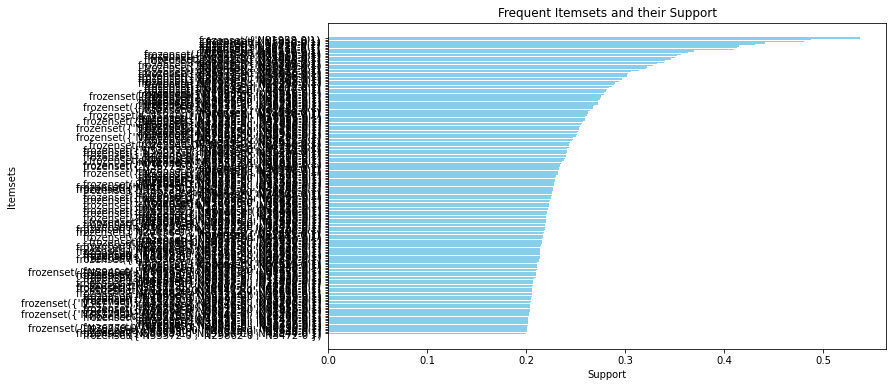

In [62]:
import matplotlib.pyplot as plt

# 绘制频繁项集支持度的条形图
plt.figure(figsize=(10, 6))
plt.barh(frequent_itemsets_sorted['itemsets'].astype(str), frequent_itemsets_sorted['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets and their Support')
plt.gca().invert_yaxis()  # 反转y轴，使支持度高的项集在上方
plt.show()


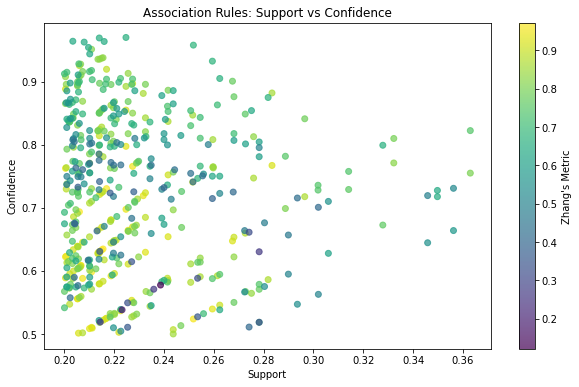

In [63]:
# 绘制关联规则支持度和置信度的散点图
plt.figure(figsize=(10, 6))
plt.scatter(rules_sorted_zhangs_metric['support'], rules_sorted_zhangs_metric['confidence'], c=rules_sorted_zhangs_metric['zhangs_metric'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Zhang's Metric")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()


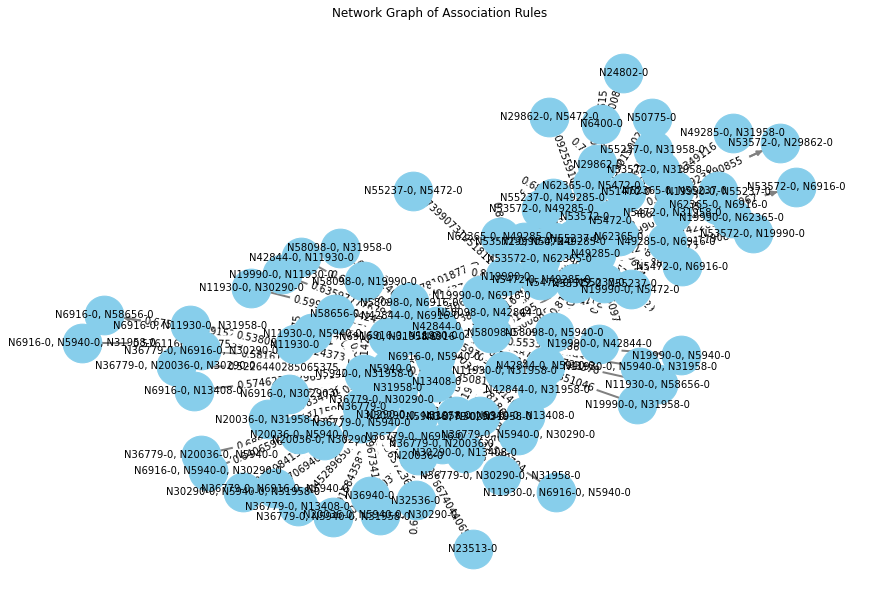

In [64]:
import networkx as nx

# 创建一个空的有向图
G = nx.DiGraph()

# 添加关联规则作为边
for index, row in rules_sorted_zhangs_metric.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['zhangs_metric'])

# 绘制网络图
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, edge_color='gray', width=2, arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Network Graph of Association Rules")
plt.show()


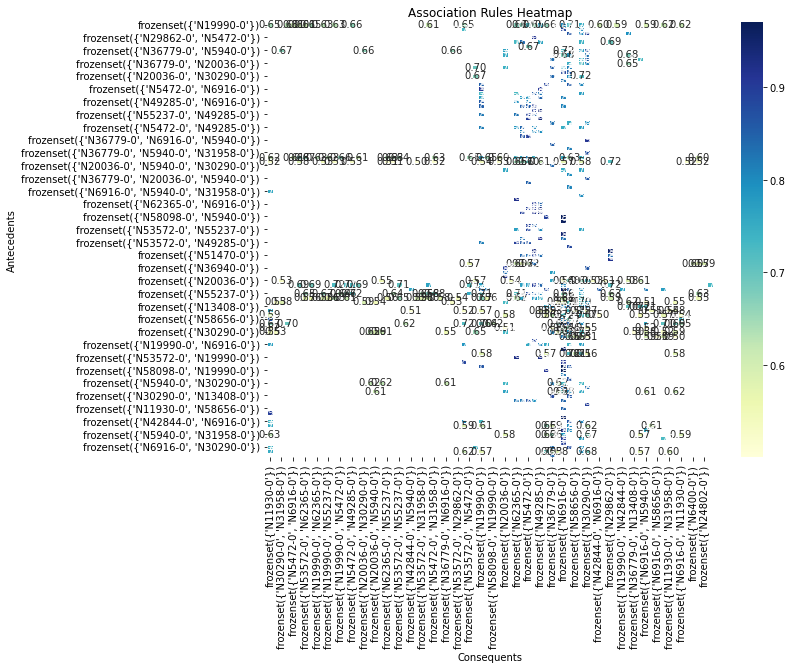

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个包含关联规则的DataFrame
rules_df = pd.DataFrame(rules)

# 构建关联规则矩阵
matrix = rules_df.pivot(index='antecedents', columns='consequents', values='confidence')

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title('Association Rules Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()
